# Assignment 6 - Numpy and Matplotlib

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

```{admonition} Learning Goals
:class: tip

- Creating new arrays using `linspace` and `arange`
- Computing basic formulas with numpy arrays
- Loading data from `.npy` files
- Performing reductions (e.g. `mean`, `std` on numpy arrays)
- Making 1D line plots
- Making scatterplots
- Annotating plots with titles and axes
```

## 1. Creating and Manipulating Arrays

First import numpy and matplotlib

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [2]:
#this is an example
#tmp = np.array([1,2,3],[1,2,3][1,2,3]), dtype=np.float64
#print(tmp)
x = np.linspace(-2,2,200)
y = np.linspace(-2,2,200)

In [3]:
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((200, 200), (200, 200))

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes.

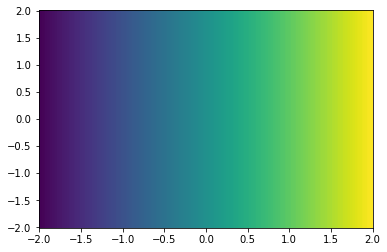

In [4]:
plt.pcolormesh(xx, yy, xx)

### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [5]:
r = np.sqrt(xx**2 + yy**2)
phi = np.arctan2(yy, xx)

#fig, ax1 = plt.subplots()

#img = ax1.pcolormesh(xx, yy, phi)
#fig.colorbar(img, ax=ax1)

### 1.4. Visualize $r$ and $\varphi$ on the 2D  $x$ / $y$ plane using `pcolormesh`

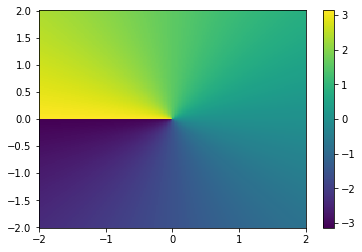

In [6]:
fig, ax1 = plt.subplots()

img = ax1.pcolormesh(xx, yy, phi)
fig.colorbar(img, ax=ax1)

### 1.5 Caclulate the quanity $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it on the x$ / $y$ plane

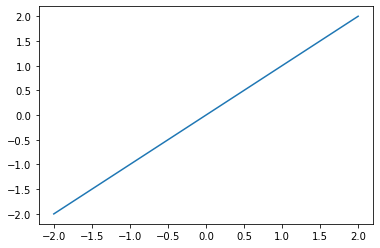

In [7]:
f = np.cos(4*r)**2 + np.sin(4*phi)**2
fix, ax = plt.subplots()
ax.plot(x, y)

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

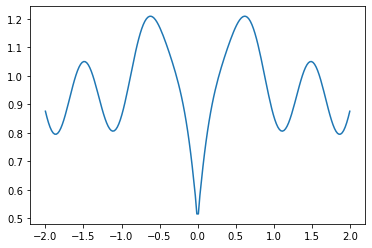

In [8]:
f_ymean = f.mean(axis=0)
plt.plot(x, f_ymean)

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

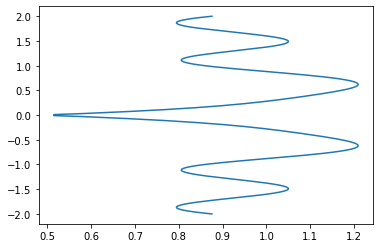

In [9]:
f_xmean = f.mean(axis=1)
plt.plot(f_xmean, y)

### 1.8 Plot the mean of $f$ with respect to $\phi$ as a function of $r$

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.


```{admonition} EXTRA CREDIT - 
:class: tip

This question is Extra Credit!  Think it over and give it a shot! If you choose to complete it (on time, or later in the quarter), drop a note to emily.roland@wwu.edu, and let me know I should take a closer look at the assignment and give you some extra points for taking on the challenge!

```



## Part 2: Analyze [ARGO](http://www.argo.ucsd.edu) Data

In this problem, we use real data from ocean profiling floats.
ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one "profile" (a set of messurements at different depths or "levels").

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="80%" />

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let's start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise.
The following code will give you a list of `.npy` files that you can open in the next step.

(Note, in this text book you may see an error - this means we don't have an environment with pooch installed activate. 

```{admonition} NOTE ON POOCH - 
:class: tip

In this text book page you may see an error following the cell blow - this means you/we don't have an environment with pooch installed activated yet!  If you created the pangeo environment, activate that before you try to run the following commands!

To do this, activate your pangeo environment `conda activate pangeo` and then re-open the jupyter notebook for your assignment with that environment activated. 
```


In [10]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy']

### 2.1 Load each data file as a numpy array.

You can use whatever names you want for your arrays, but I recommend

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

**Note**: you have to actually look at the file name (the items in `files`) to know which files corresponds to which variable.


In [11]:
T = np.load('/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy')
S = np.load('/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy')
P = np.load('/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy')
date = np.load('/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy')
lat = np.load('/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy')
lon = np.load('/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy')
level = np.load('/Users/lucygreeley/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy')

#size of level corresponds to row in temp

### 2.2 Examine the shapes of T, S and P compared to `lon`, `lat`, `date` and `level`. How do you think they are related?

Based on the shapes, which dimensions do you think are shared among the arrays?

In [12]:
print(T.shape)
print(S.shape)
print(P.shape)
print(lon.shape)
print(lat.shape)
print(date.shape)
print(level.shape)

(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(75,)
(78,)


### 2.3 Make a plot for each column of data in T, S and P (three plots). 

The vertical scale should be the `levels` data. Each plot should have a line for each column of data. It will look messy.

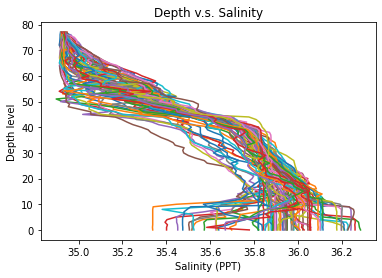

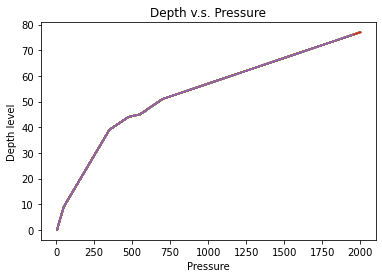

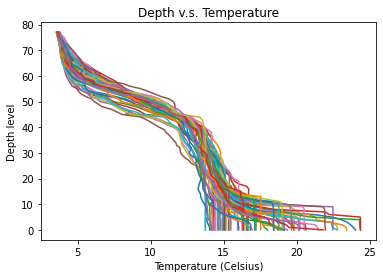

In [14]:
#x = np.arange(75)
#y = np.arange(78)
#fig, ax = plt.subplots()
#ax.plot(x, y)
x_1 = S
x_2 = P
x_3 = T

y=level

plt.plot(x_1,y)
plt.xlabel('Salinity (PPT)')
plt.ylabel('Depth level')
plt.title('Depth v.s. Salinity')
plt.show()

plt.plot(x_2,y)
plt.xlabel('Pressure')
plt.ylabel('Depth level')
plt.title('Depth v.s. Pressure')
plt.show()

plt.plot(x_3, y)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Depth level')
plt.title('Depth v.s. Temperature')
plt.show()

NameError: name 'xxT' is not defined

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show [error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) on each plot using the standard deviations. 


### 2.6 Account For Missing Data

The profiles contain many missing values. These are indicated by the special "Not a Number" value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

### 2.7 Create a scatter plot of the `lon`, `lat` positions of the ARGO float.

Use the [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.